## aggregate data frames

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_pickle('../data/cleaned_train_data.pkl')
train_data.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [3]:
train_data[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf','saleprice']]

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,saleprice
id,,,,,,
1,7,1710,2,548,856,208500
2,6,1262,2,460,1262,181500
3,7,1786,2,608,920,223500
4,7,1717,3,642,756,140000
5,8,2198,3,836,1145,250000
...,...,...,...,...,...,...
1456,6,1647,2,460,953,175000
1457,6,2073,2,500,1542,210000
1458,7,2340,1,252,1152,266500


c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


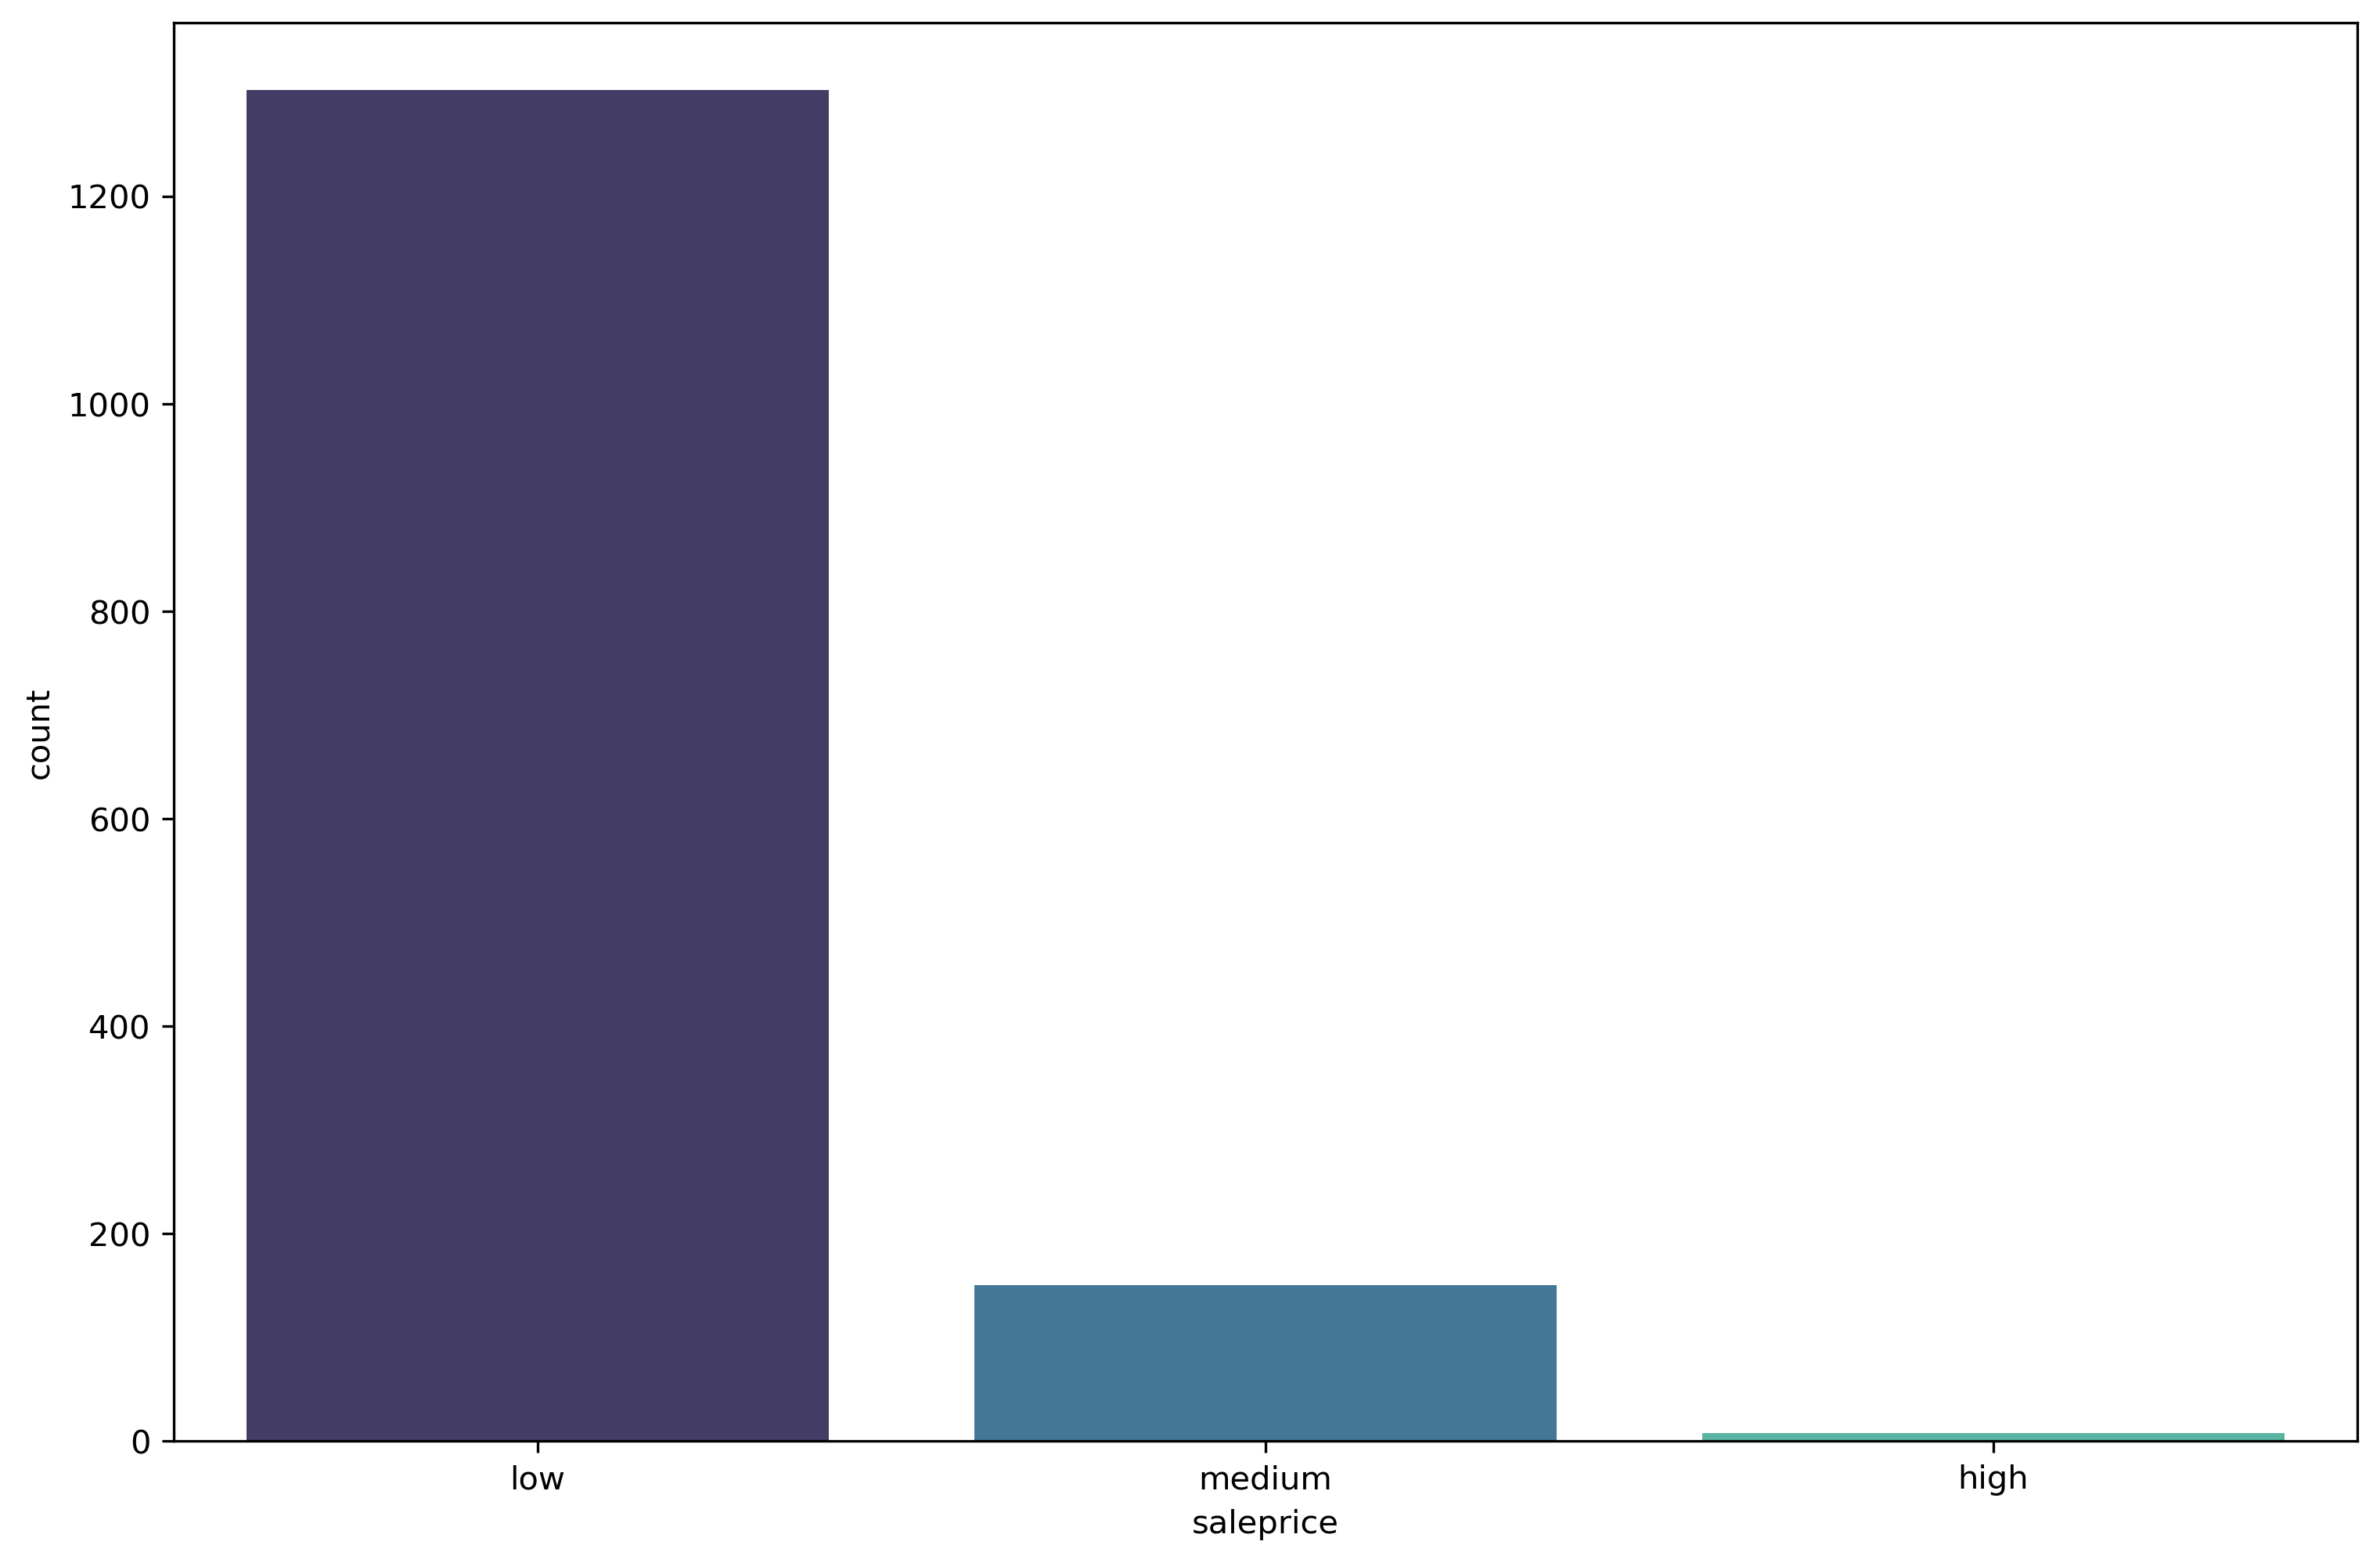

In [4]:
# put sale price into ordinal form
sales_price_levels = pd.cut(train_data['saleprice'],bins=3,labels=['low','medium','high'])

plt.figure(figsize=[12,8],dpi=300)
sns.countplot(sales_price_levels,palette='mako')
plt.show()

In [5]:
numerical_features = train_data.select_dtypes(include=np.number)
numerical_features.head(5)

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# z scores
saleprice_z = np.abs(ss.zscore(numerical_features['saleprice']))
saleprice_z

array([0.34727322, 0.00728832, 0.53615372, ..., 1.07761115, 0.48852299,
       0.42084081])

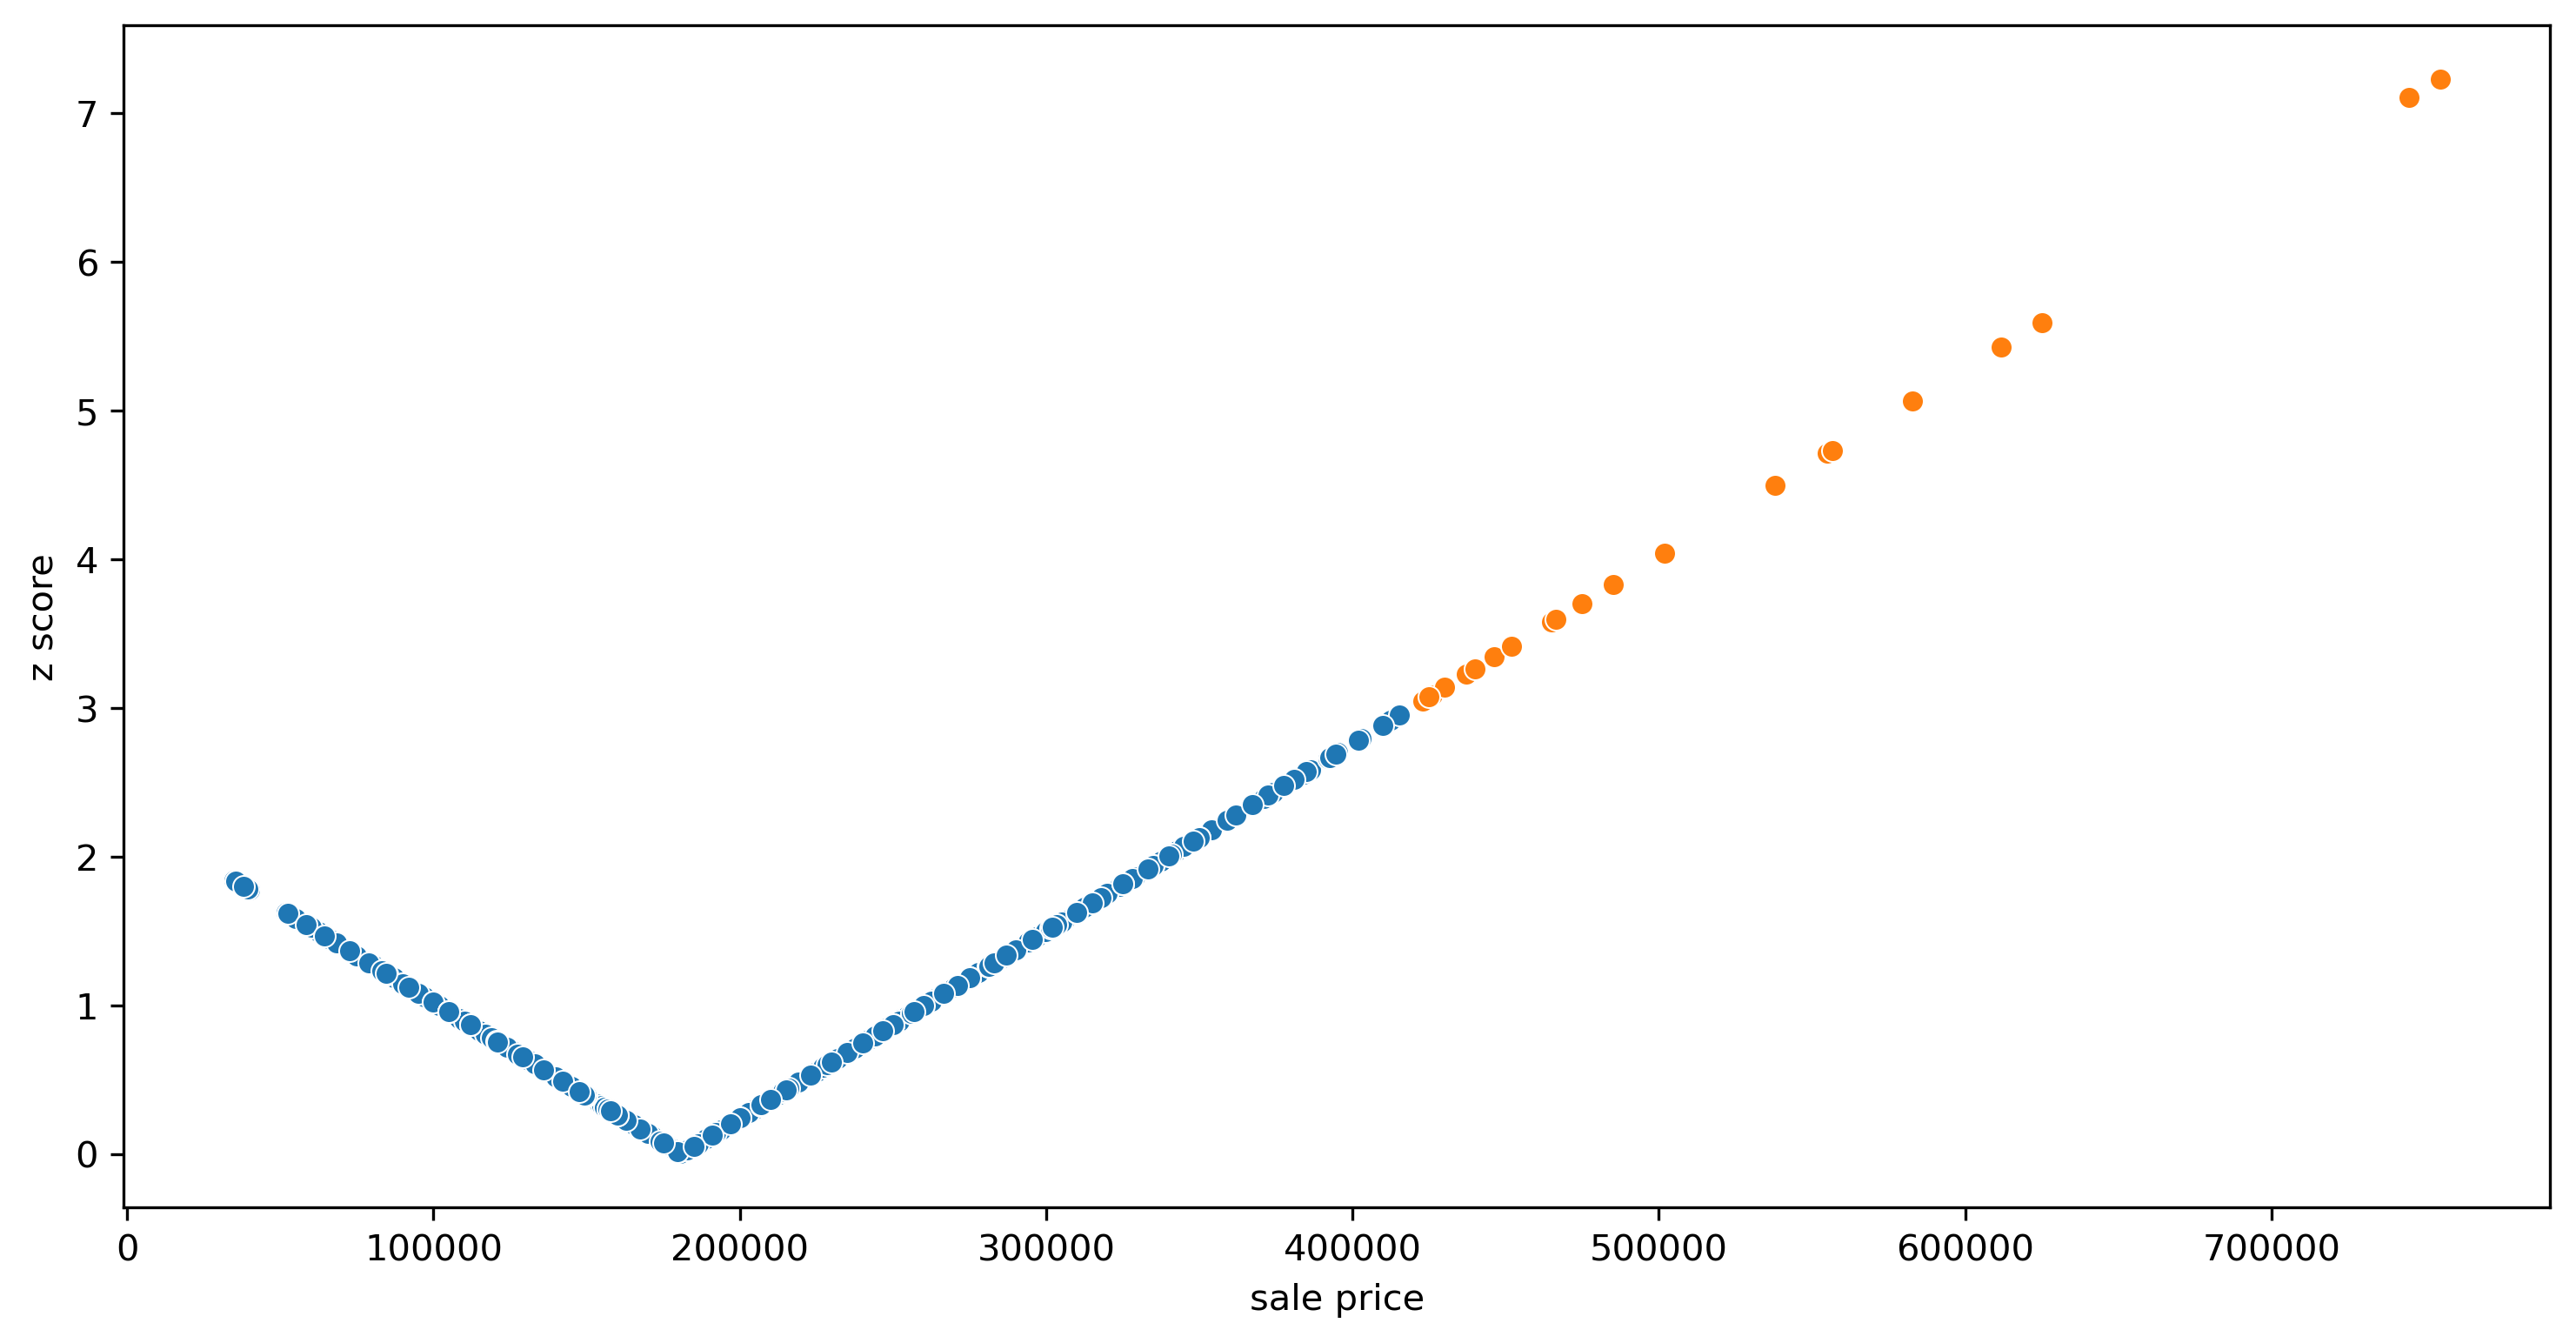

In [7]:
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=train_data[saleprice_z<3]['saleprice'],y=saleprice_z[saleprice_z<3])
sns.scatterplot(x=train_data[saleprice_z>3]['saleprice'],y=saleprice_z[saleprice_z>3])
plt.xlabel('sale price')
plt.ylabel('z score')
plt.show()

In [8]:
by_housestyle = train_data.pivot_table(index=['housestyle','yearbuilt'],
                       aggfunc='median')
by_housestyle

1stflrsf  2ndflrsf  3ssnporch  bedroomabvgr  bsmtfinsf1  \
housestyle yearbuilt                                                            
1.5Fin     1875          780.0     240.0          0           2.0         0.0   
           1890         1188.0     561.0          0           2.0      1088.0   
           1900          961.0     551.0          0           3.0       241.0   
           1905         1221.0     691.0          0           3.0         0.0   
           1906          756.0     713.0          0           3.0         0.0   
...                        ...       ...        ...           ...         ...   
SLvl       2000          774.0     656.0          0           3.0       125.0   
           2002          779.0     640.0          0           3.0       353.0   
           2003         1146.0       0.0          0           3.0       786.0   
           2005         1072.0       0.0          0           2.0       547.0   
           2006          754.0     640.0          0           3.0         0.0   

                      bsmtfinsf2  bsmtfullbath  bsmthalfbath  bsmtunfsf  \
housestyle yearbuilt                                                      
1.5Fin     1875              0.0           0.0           0.0      780.0   
           1890              0.0           0.0           0.0        0.0   
           1900              0.0           0.0           0.0      290.0   
           1905              0.0           0.0           0.0      482.0   
           1906              0.0           0.0           0.0      756.0   
...                          ...           ...           ...        ...   
SLvl       2000              0.0           0.0           0.0      259.0   
           2002              0.0           1.0           0.0       55.0   
           2003              0.0           1.0           0.0       82.0   
           2005              0.0           1.0           0.0       88.0   
           2006              0.0           0.0           0.0      384.0   

                      enclosedporch  ...  overallcond  overallqual  poolarea  \
housestyle yearbuilt                 ...                                       
1.5Fin     1875               176.0  ...          8.0          5.0         0   
           1890               244.0  ...          6.0          5.0         0   
           1900                77.0  ...          7.0          5.0         0   
           1905               212.0  ...          7.0          6.0         0   
           1906               239.0  ...          7.0          6.0         0   
...                             ...  ...          ...          ...       ...   
SLvl       2000                 0.0  ...          5.0          7.0         0   
           2002                 0.0  ...          5.0          8.0         0   
           2003                 0.0  ...          5.0          7.0         0   
           2005                 0.0  ...          5.0          6.0         0   
           2006                 0.0  ...          5.0          5.0         0   

                      saleprice  screenporch  totalbsmtsf  totrmsabvgrd  \
housestyle yearbuilt                                                      
1.5Fin     1875         94000.0          0.0        780.0           6.0   
           1890        124900.0          0.0       1088.0           7.0   
           1900        119000.0          0.0        861.0           7.0   
           1905        163000.0          0.0        482.0           7.0   
           1906        135000.0          0.0        756.0           7.0   
...                         ...          ...          ...           ...   
SLvl       2000        175000.0          0.0        384.0           7.5   
           2002        184100.0          0.0        408.0           7.0   
           2003        187500.0          0.0        868.0           6.0   
           2005        148000.0          0.0        547.0           5.0   
           2006        167500.0          0.0       

In [9]:
sold_date = pd.to_datetime(train_data[['yrsold','mosold']].apply(lambda x: '{}-{}'.format(x.yrsold,x.mosold),axis=1))

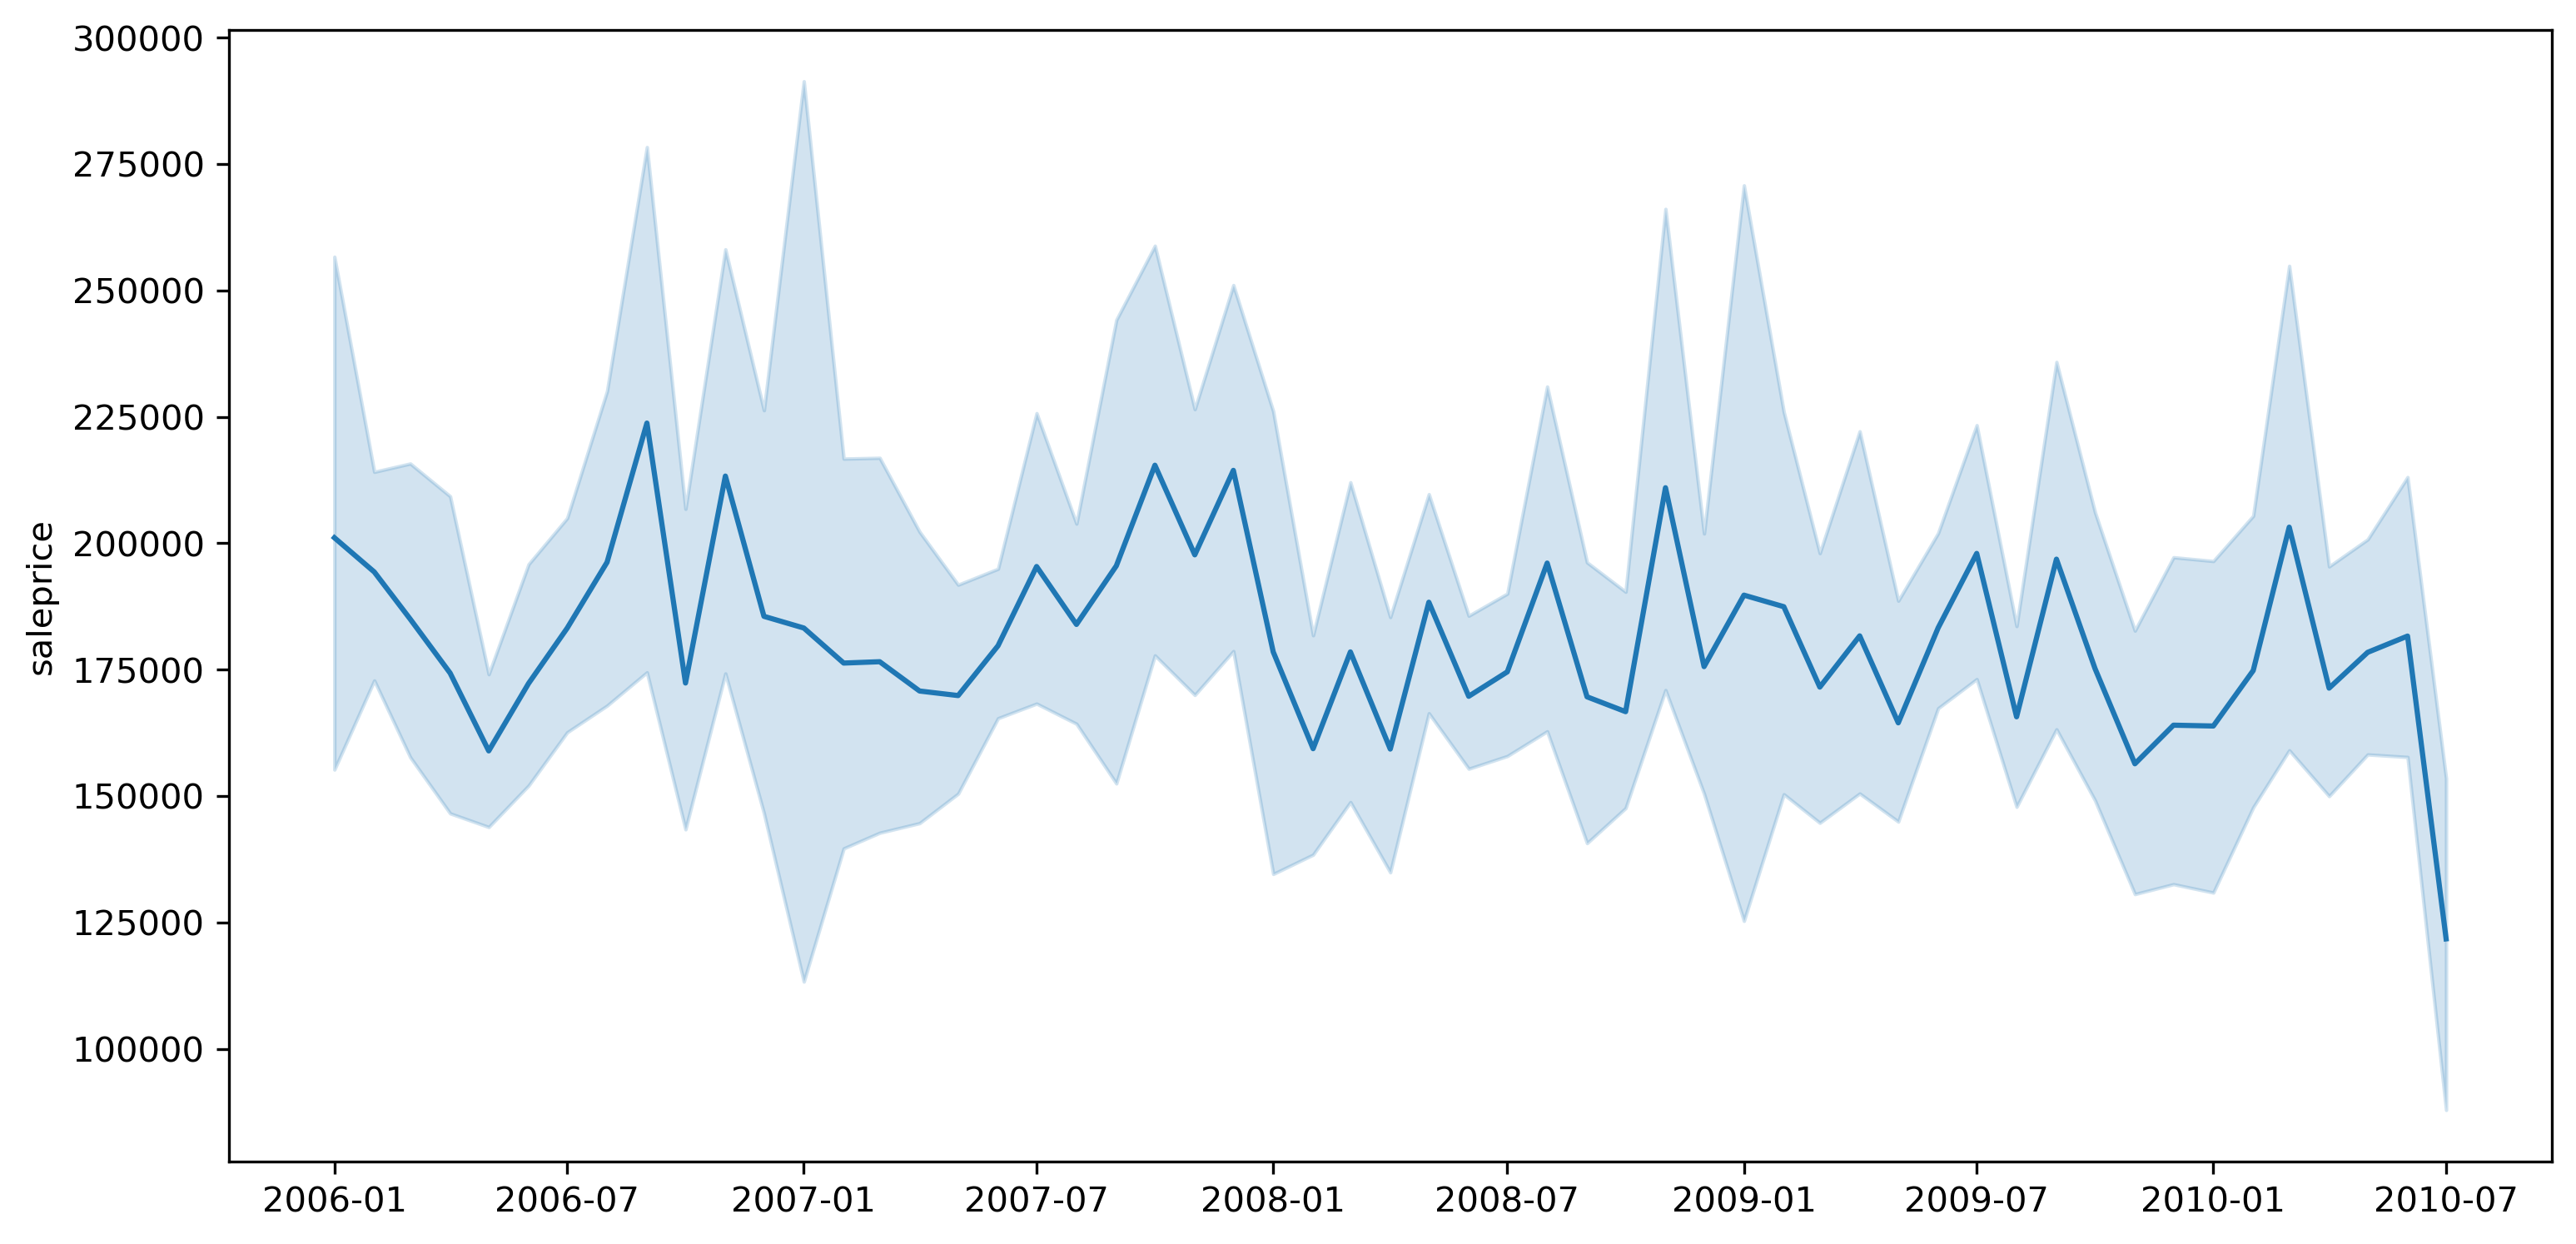

In [10]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=sold_date,y=train_data.saleprice)
plt.show()

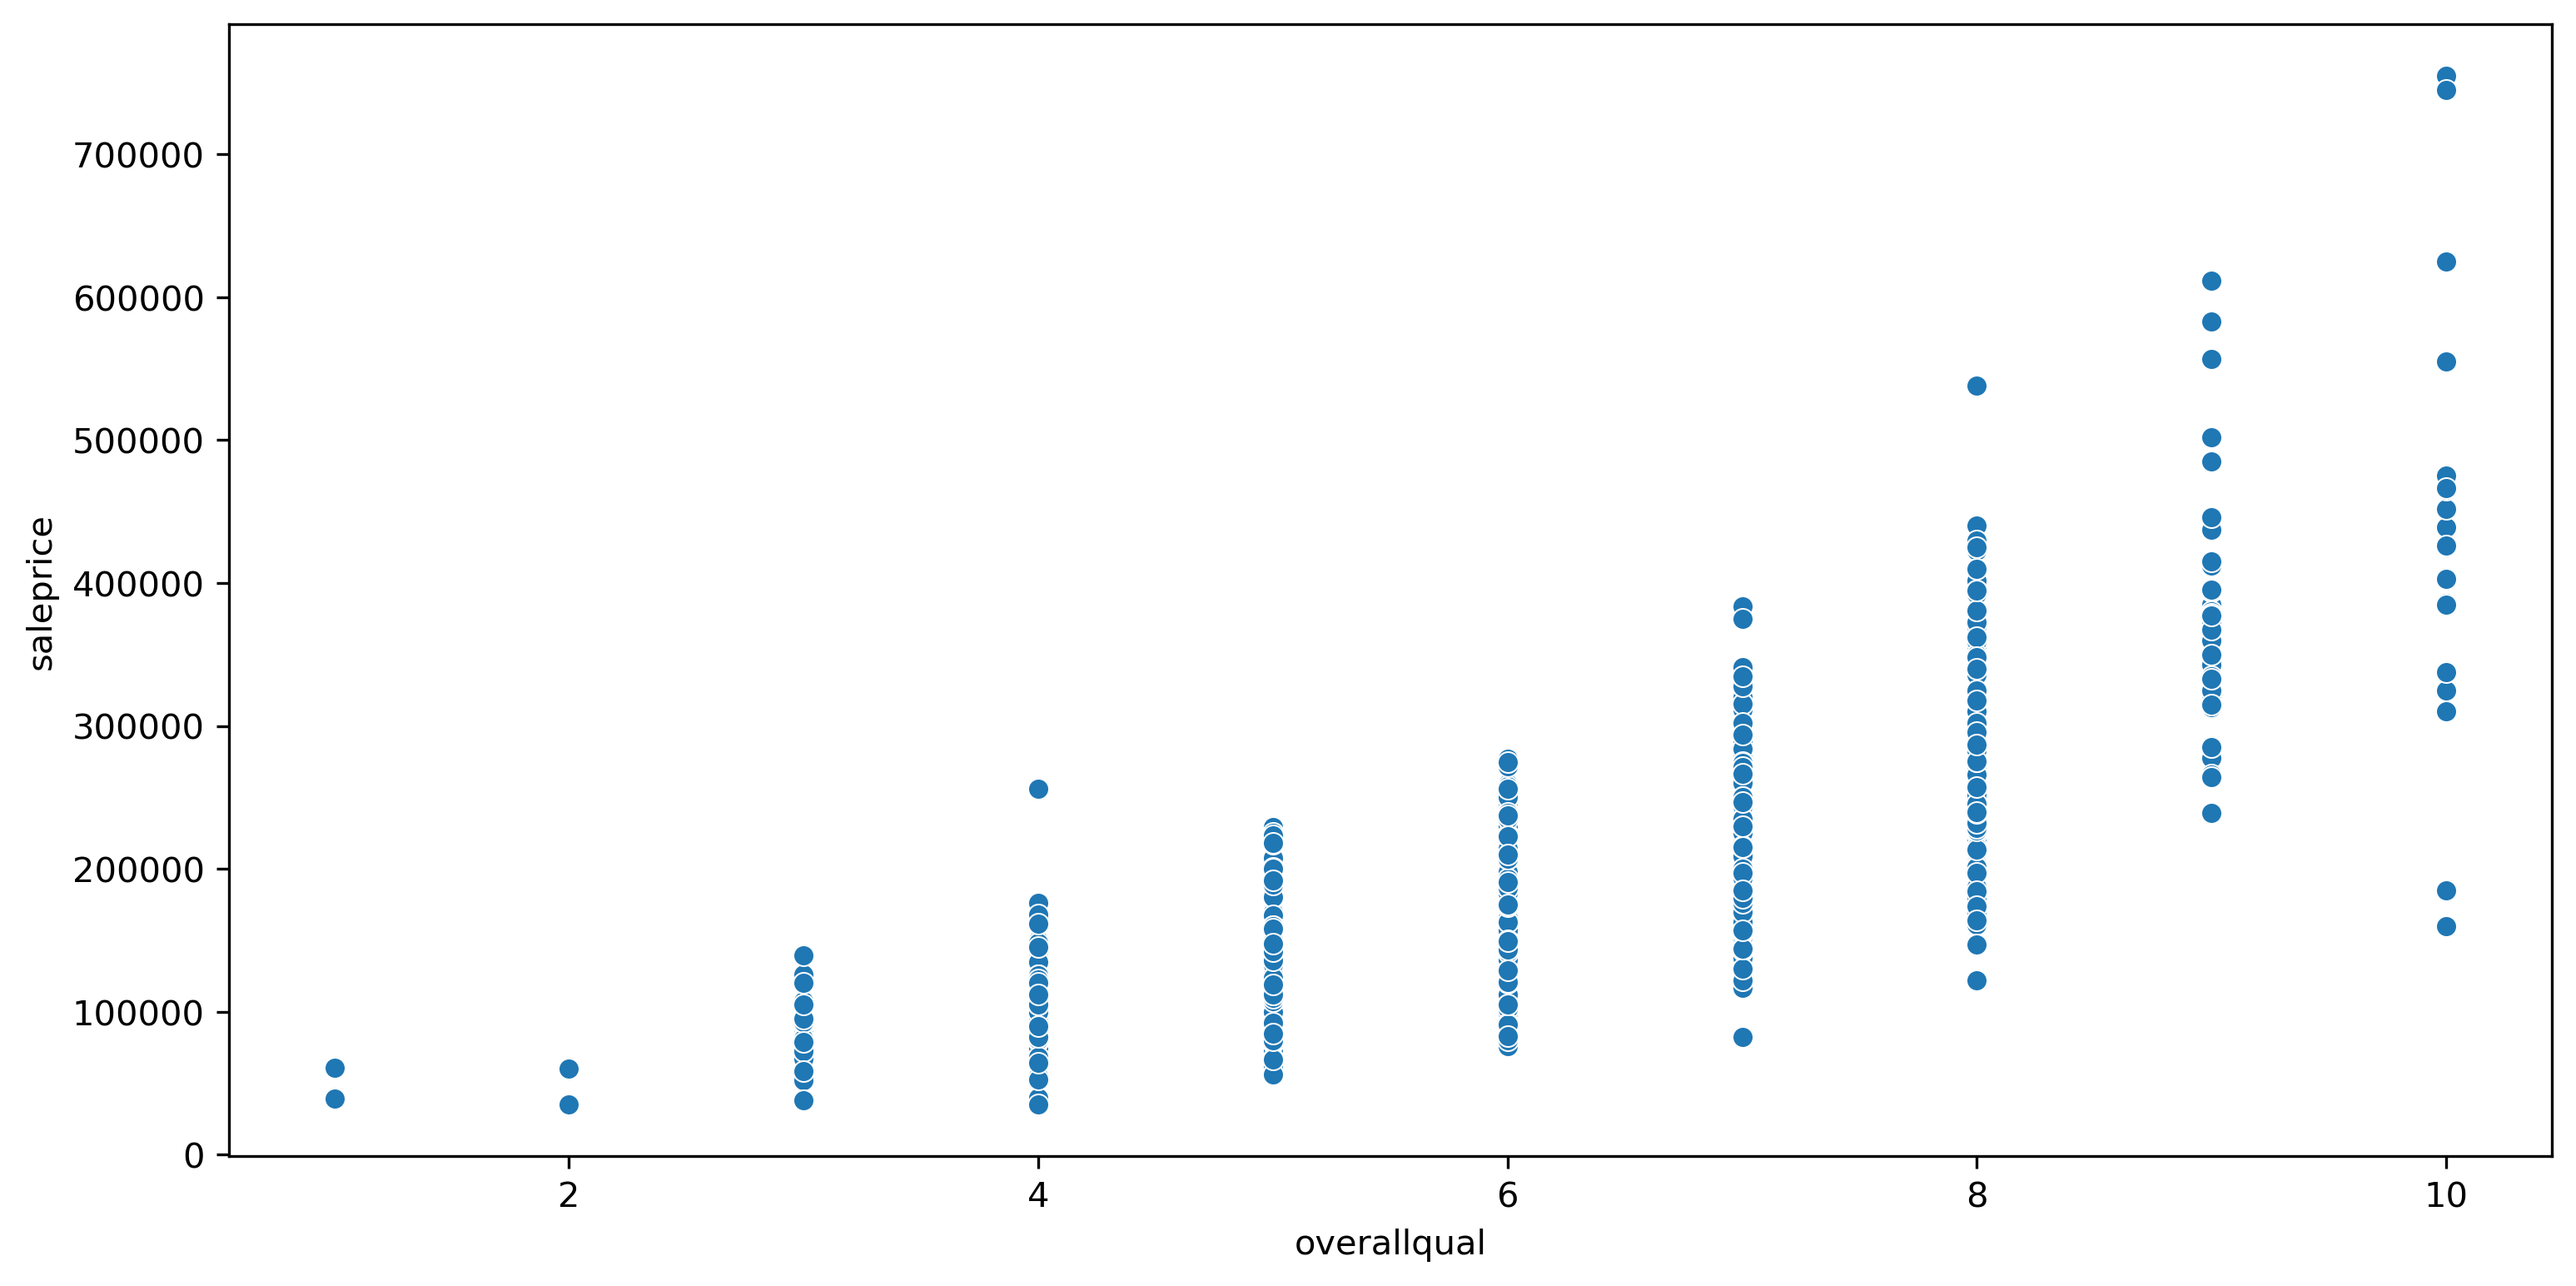

In [11]:
# overallqual grlivarea garagecars garagearea totalbsmtsf
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x='overallqual',y='saleprice',data=train_data)
plt.show()

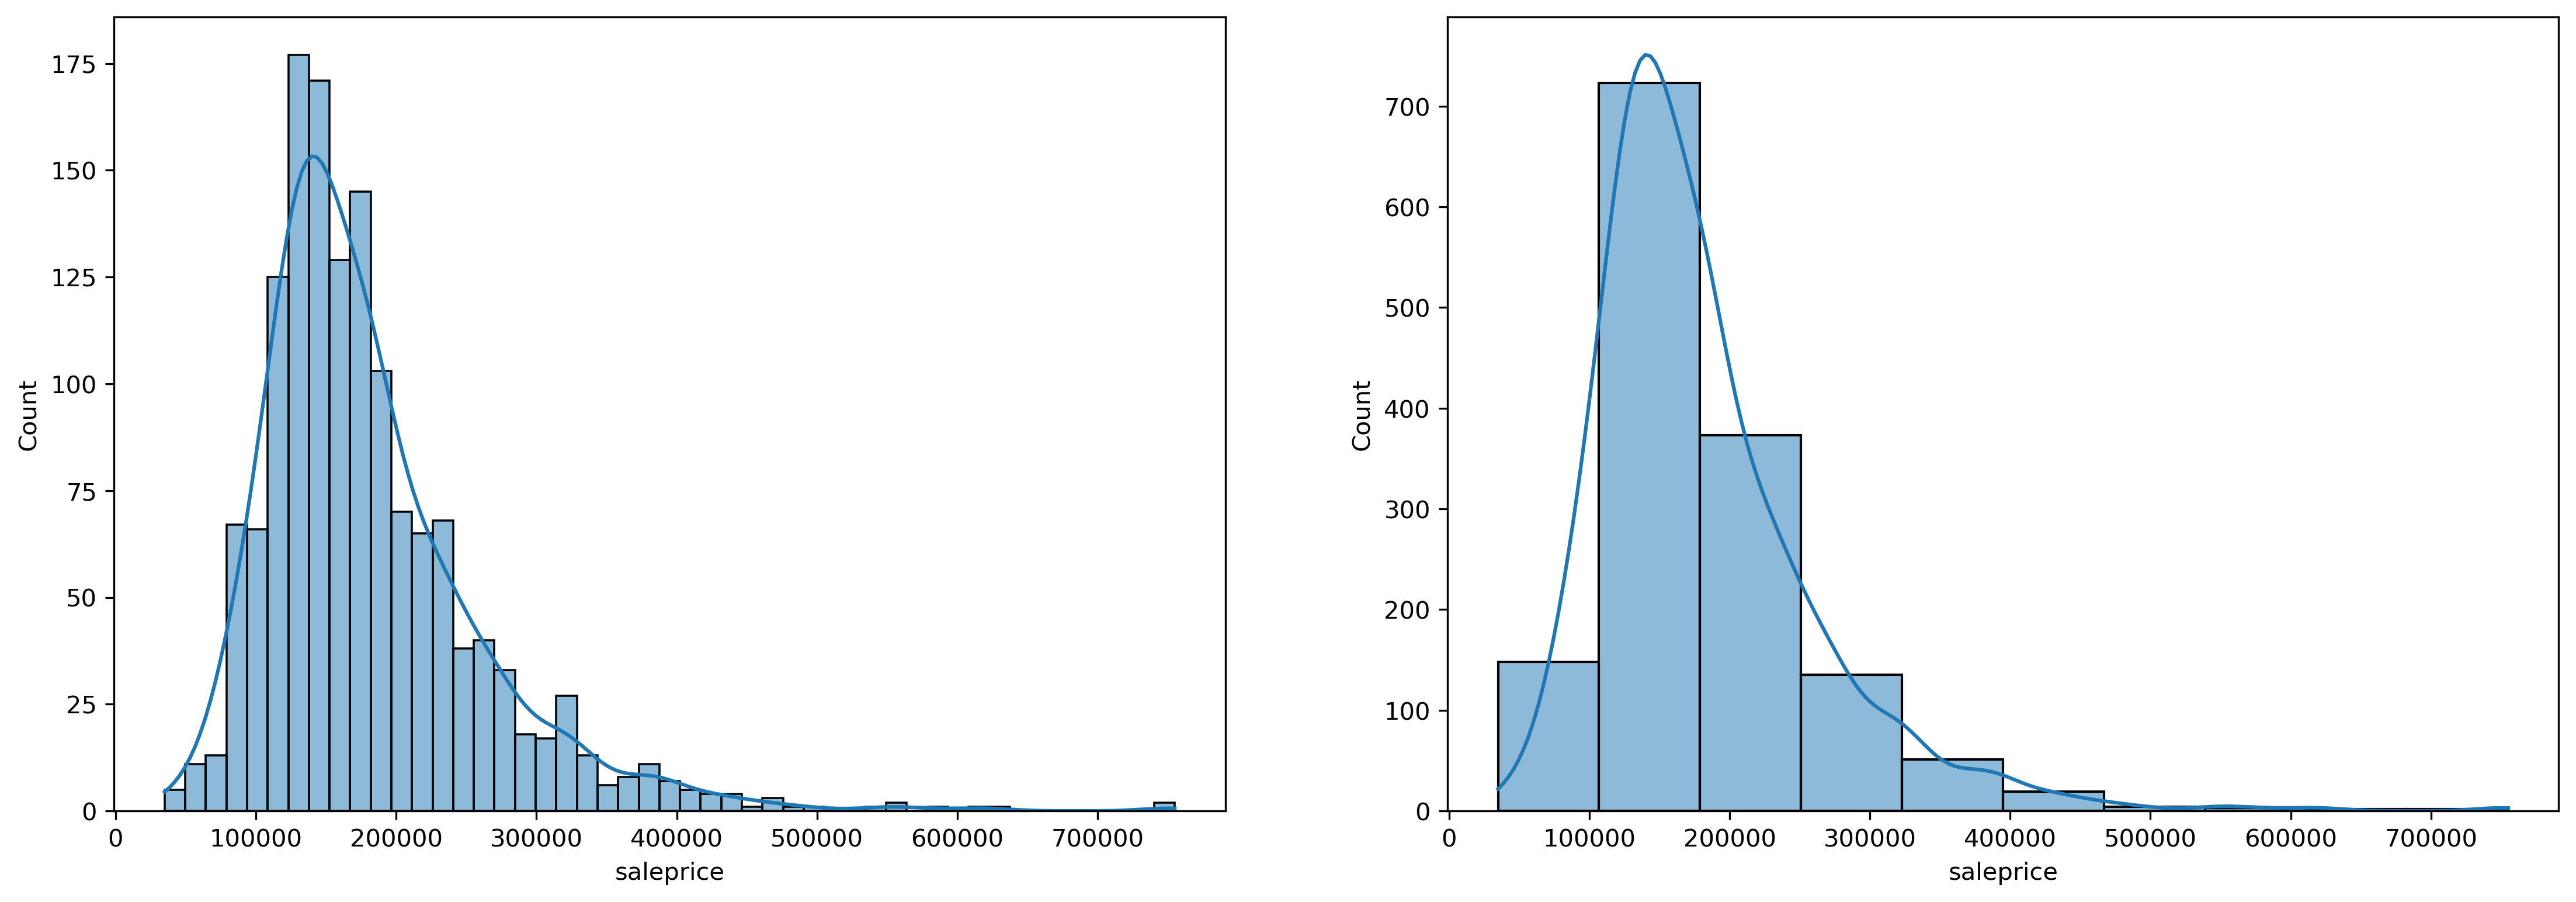

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[18,6],dpi=300)
sns.histplot(train_data.saleprice,kde=True,ax=axes[0])
sns.histplot(train_data.saleprice,bins=10,kde=True,ax=axes[1])
plt.show()

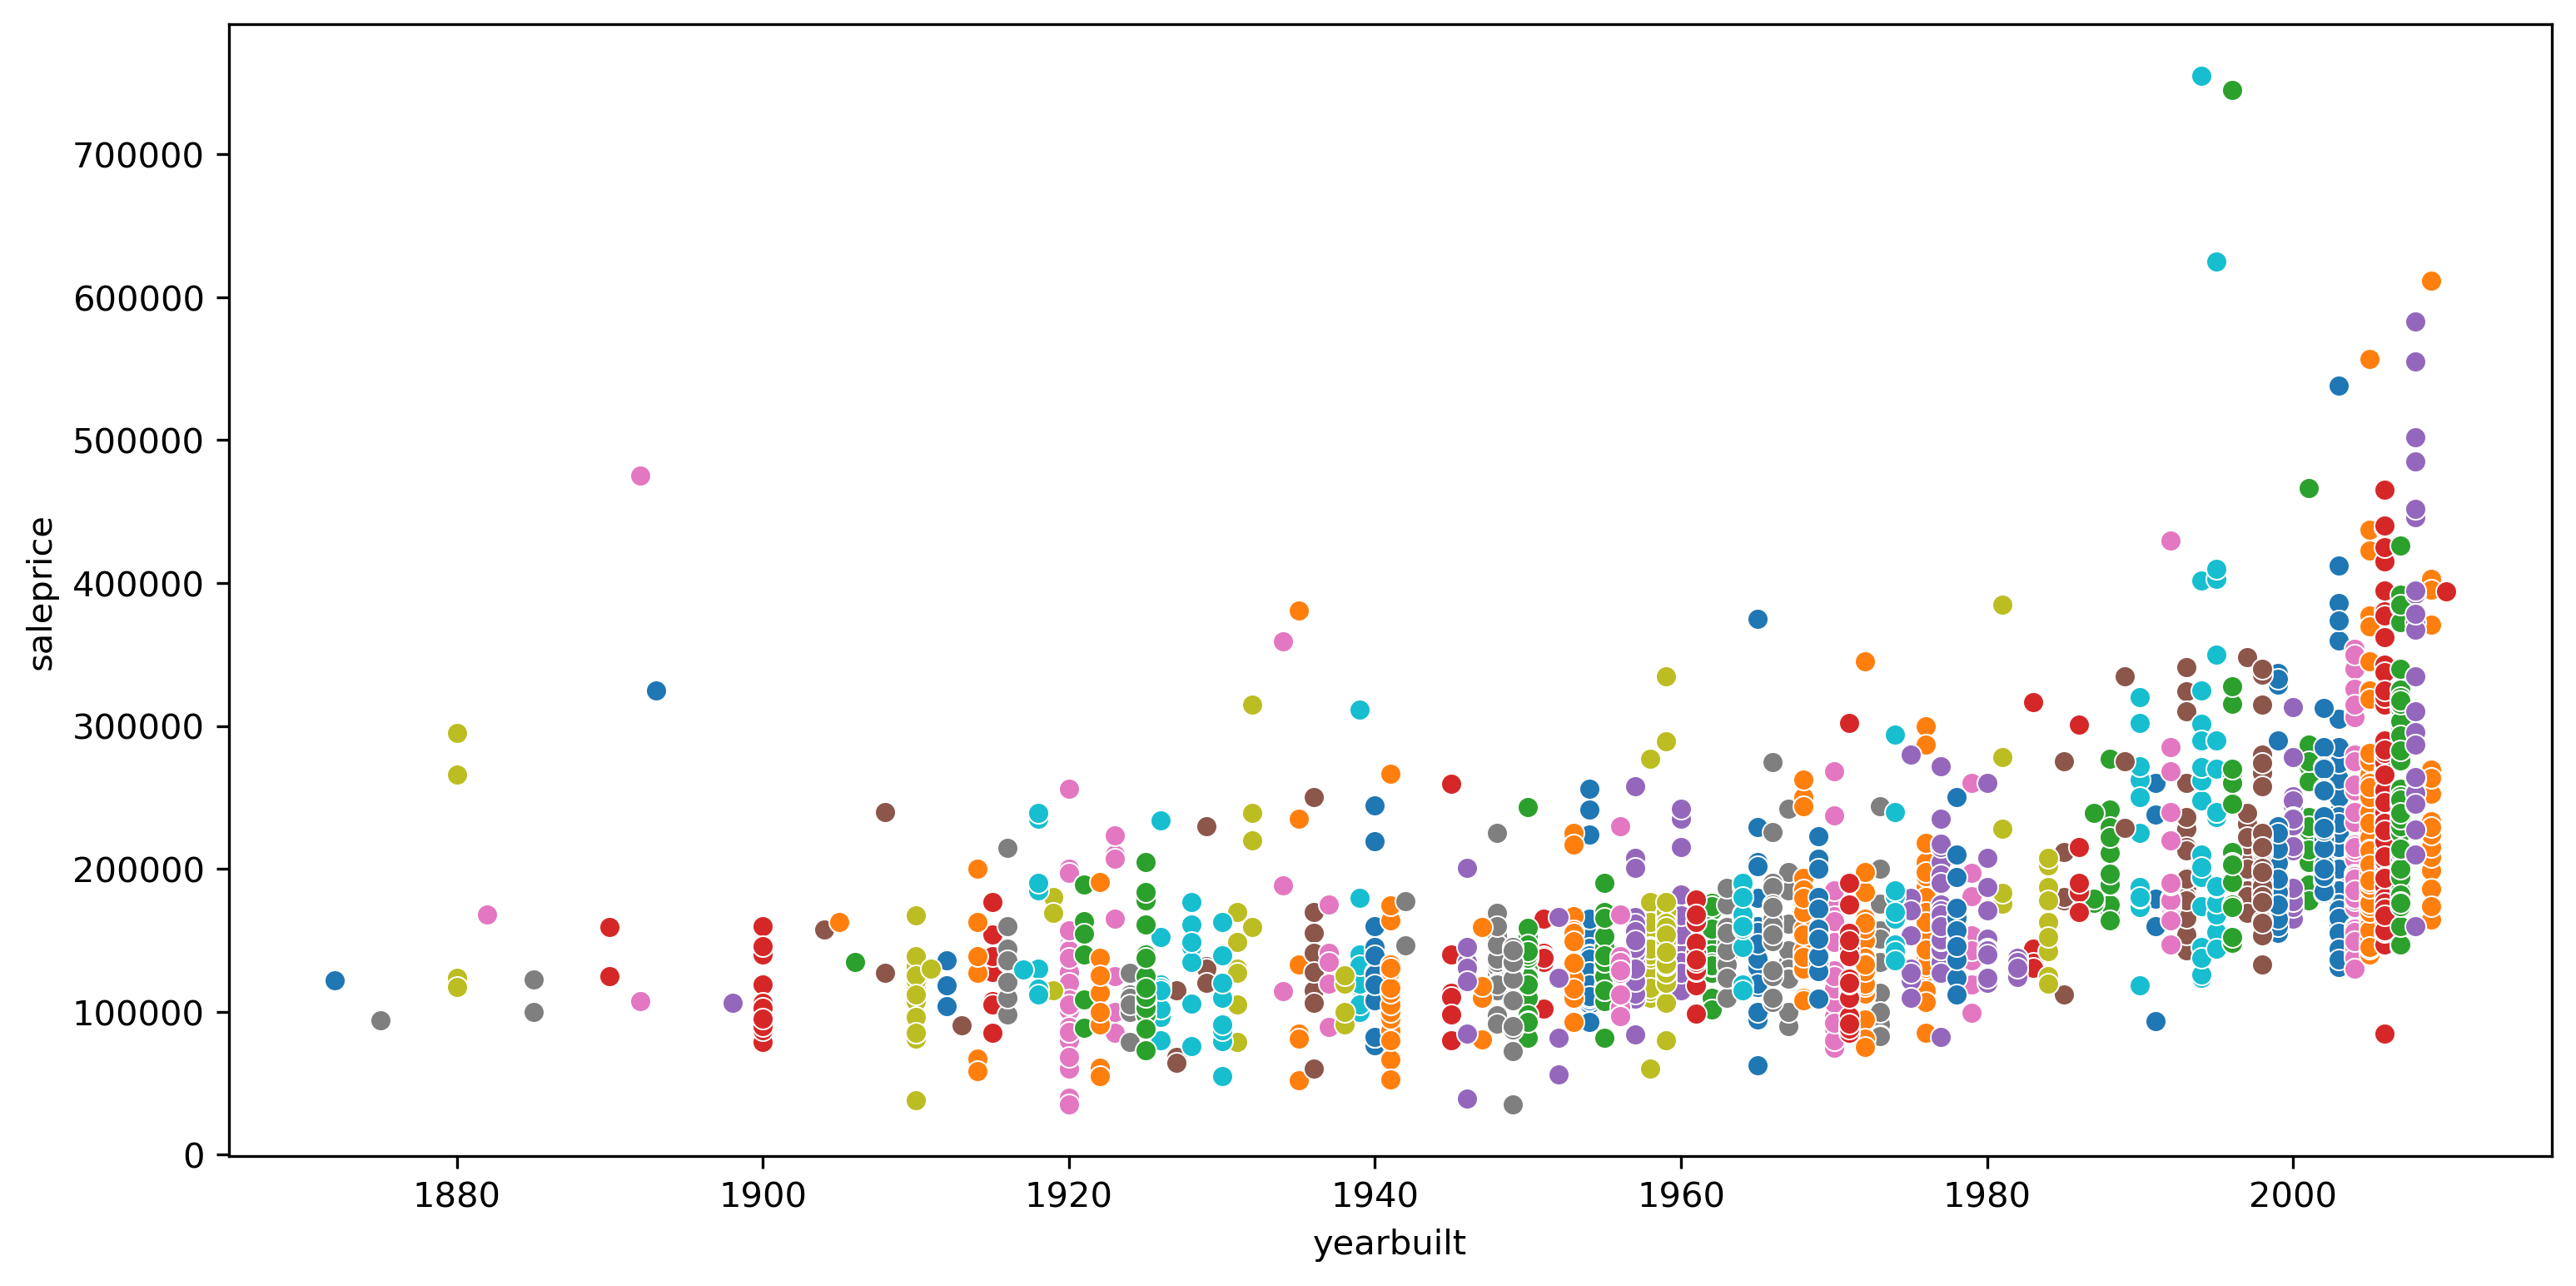

In [13]:
years = train_data.yearbuilt.unique()

plt.figure(figsize=[12,6],dpi=300)
for year in years:
    sns.scatterplot(x=train_data[train_data.yearbuilt==year].yearbuilt,
                 y=train_data[train_data.yearbuilt==year].saleprice)
plt.show()

In [14]:
class LinearRegression:
    def __init__(self,x,y):
        self.x = np.hstack([x,np.ones(x.shape[0]).reshape(-1,1)])
        self.y = y
        self.beta = []

    def fit(self):
        xtx = np.linalg.pinv(np.dot(self.x.T, self.x))
        xty = np.dot(self.x.T, self.y)
        self.beta = np.dot(xtx, xty)
        return self.beta

    def predict(self,x):
        x = np.hstack([x,np.ones(x.shape[0]).reshape(-1,1)])
        return np.dot(x,self.beta)

In [57]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_data[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']],
                                                 train_data['saleprice'],
                                                 random_state=42,
                                                 test_size=0.2)
train_x.shape,test_y.shape

((1168, 5), (292,))

In [16]:
model = LinearRegression(train_x,train_y)
model.fit()

array([ 2.38356716e+04,  4.24297678e+01,  1.59140142e+04,  1.56063185e+01,
        2.75004748e+01, -9.42633614e+04])

In [17]:
predictions = model.predict(test_x)
predictions

array([143222.74506142, 290845.7840701 , 133699.57930488, 185346.96043115,
       295519.68066208,  45135.37769261, 215993.83637865, 172736.12435098,
        45135.37769261, 127055.9601383 , 178217.99439021, 106167.65759569,
       106980.01812029, 219564.84316903, 184921.16810873, 115064.21156468,
       207360.74750996, 120683.85172071, 140240.83376151, 215834.51006578,
       171982.8926911 , 227383.60623777, 171927.79600837, 111090.46375371,
       214878.35315965, 172696.40599463, 204300.99509613,  99569.6101825 ,
       181436.45325325, 206232.60030027, 132714.57281357, 248178.26426542,
       199799.01864397,  87983.51810308, 271711.88983326, 150098.26404736,
       158581.3785012 , 216285.00463328, 300305.33332421,  83058.8119181 ,
       161156.62686555, 227237.35356635, 111632.51023288, 308654.39169685,
       134760.91861198, 189354.24293301, 109100.01156196, 113636.4312038 ,
       349750.48142495, 134443.38203837, 111147.38100495, 201302.29786908,
       108661.27619978, 3

In [18]:
pd.Series(predictions)

0      143222.745061
1      290845.784070
2      133699.579305
3      185346.960431
4      295519.680662
           ...      
287    116325.797235
288    218118.356018
289    192611.046073
290    106444.617171
291    100552.808246
Length: 292, dtype: float64

In [19]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(test_y,predictions)*100,np.sqrt(mean_squared_error(test_y,predictions)),mean_absolute_error(test_y,predictions)

(79.161840188902, 39979.43012458012, 25284.809688664547)

<Figure size 3600x3000 with 0 Axes>

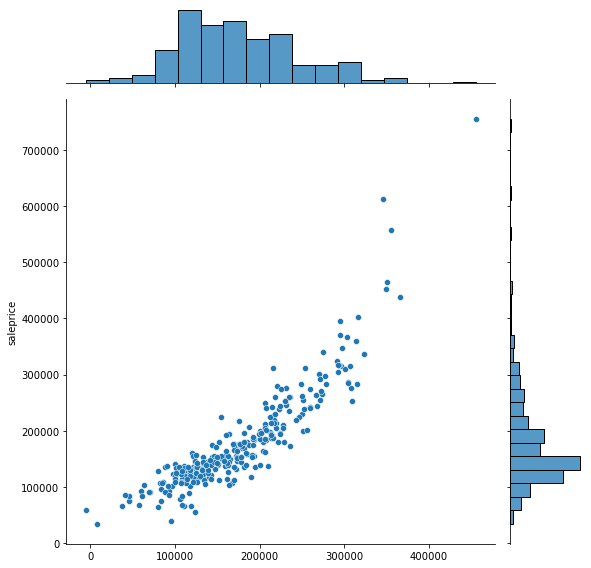

In [20]:
plt.figure(figsize=[12,10],dpi=300)
sns.jointplot(x=predictions,y=test_y,kind='scatter',height=8)
# plt.savefig('./prediction.jpg')
plt.show()

In [ ]:
train_x = np.asarray(train_x['overallqual']).reshape(-1,1)
test_x = np.asarray(test_x['overallqual']).reshape(-1,1)

model_ = LinearRegression(train_x,train_y)
model_.fit()
predictions_ = model_.predict(test_x)

r2_score(test_y,predictions_)*100,np.sqrt(mean_squared_error(test_y,predictions_)),mean_absolute_error(test_y,predictions_)

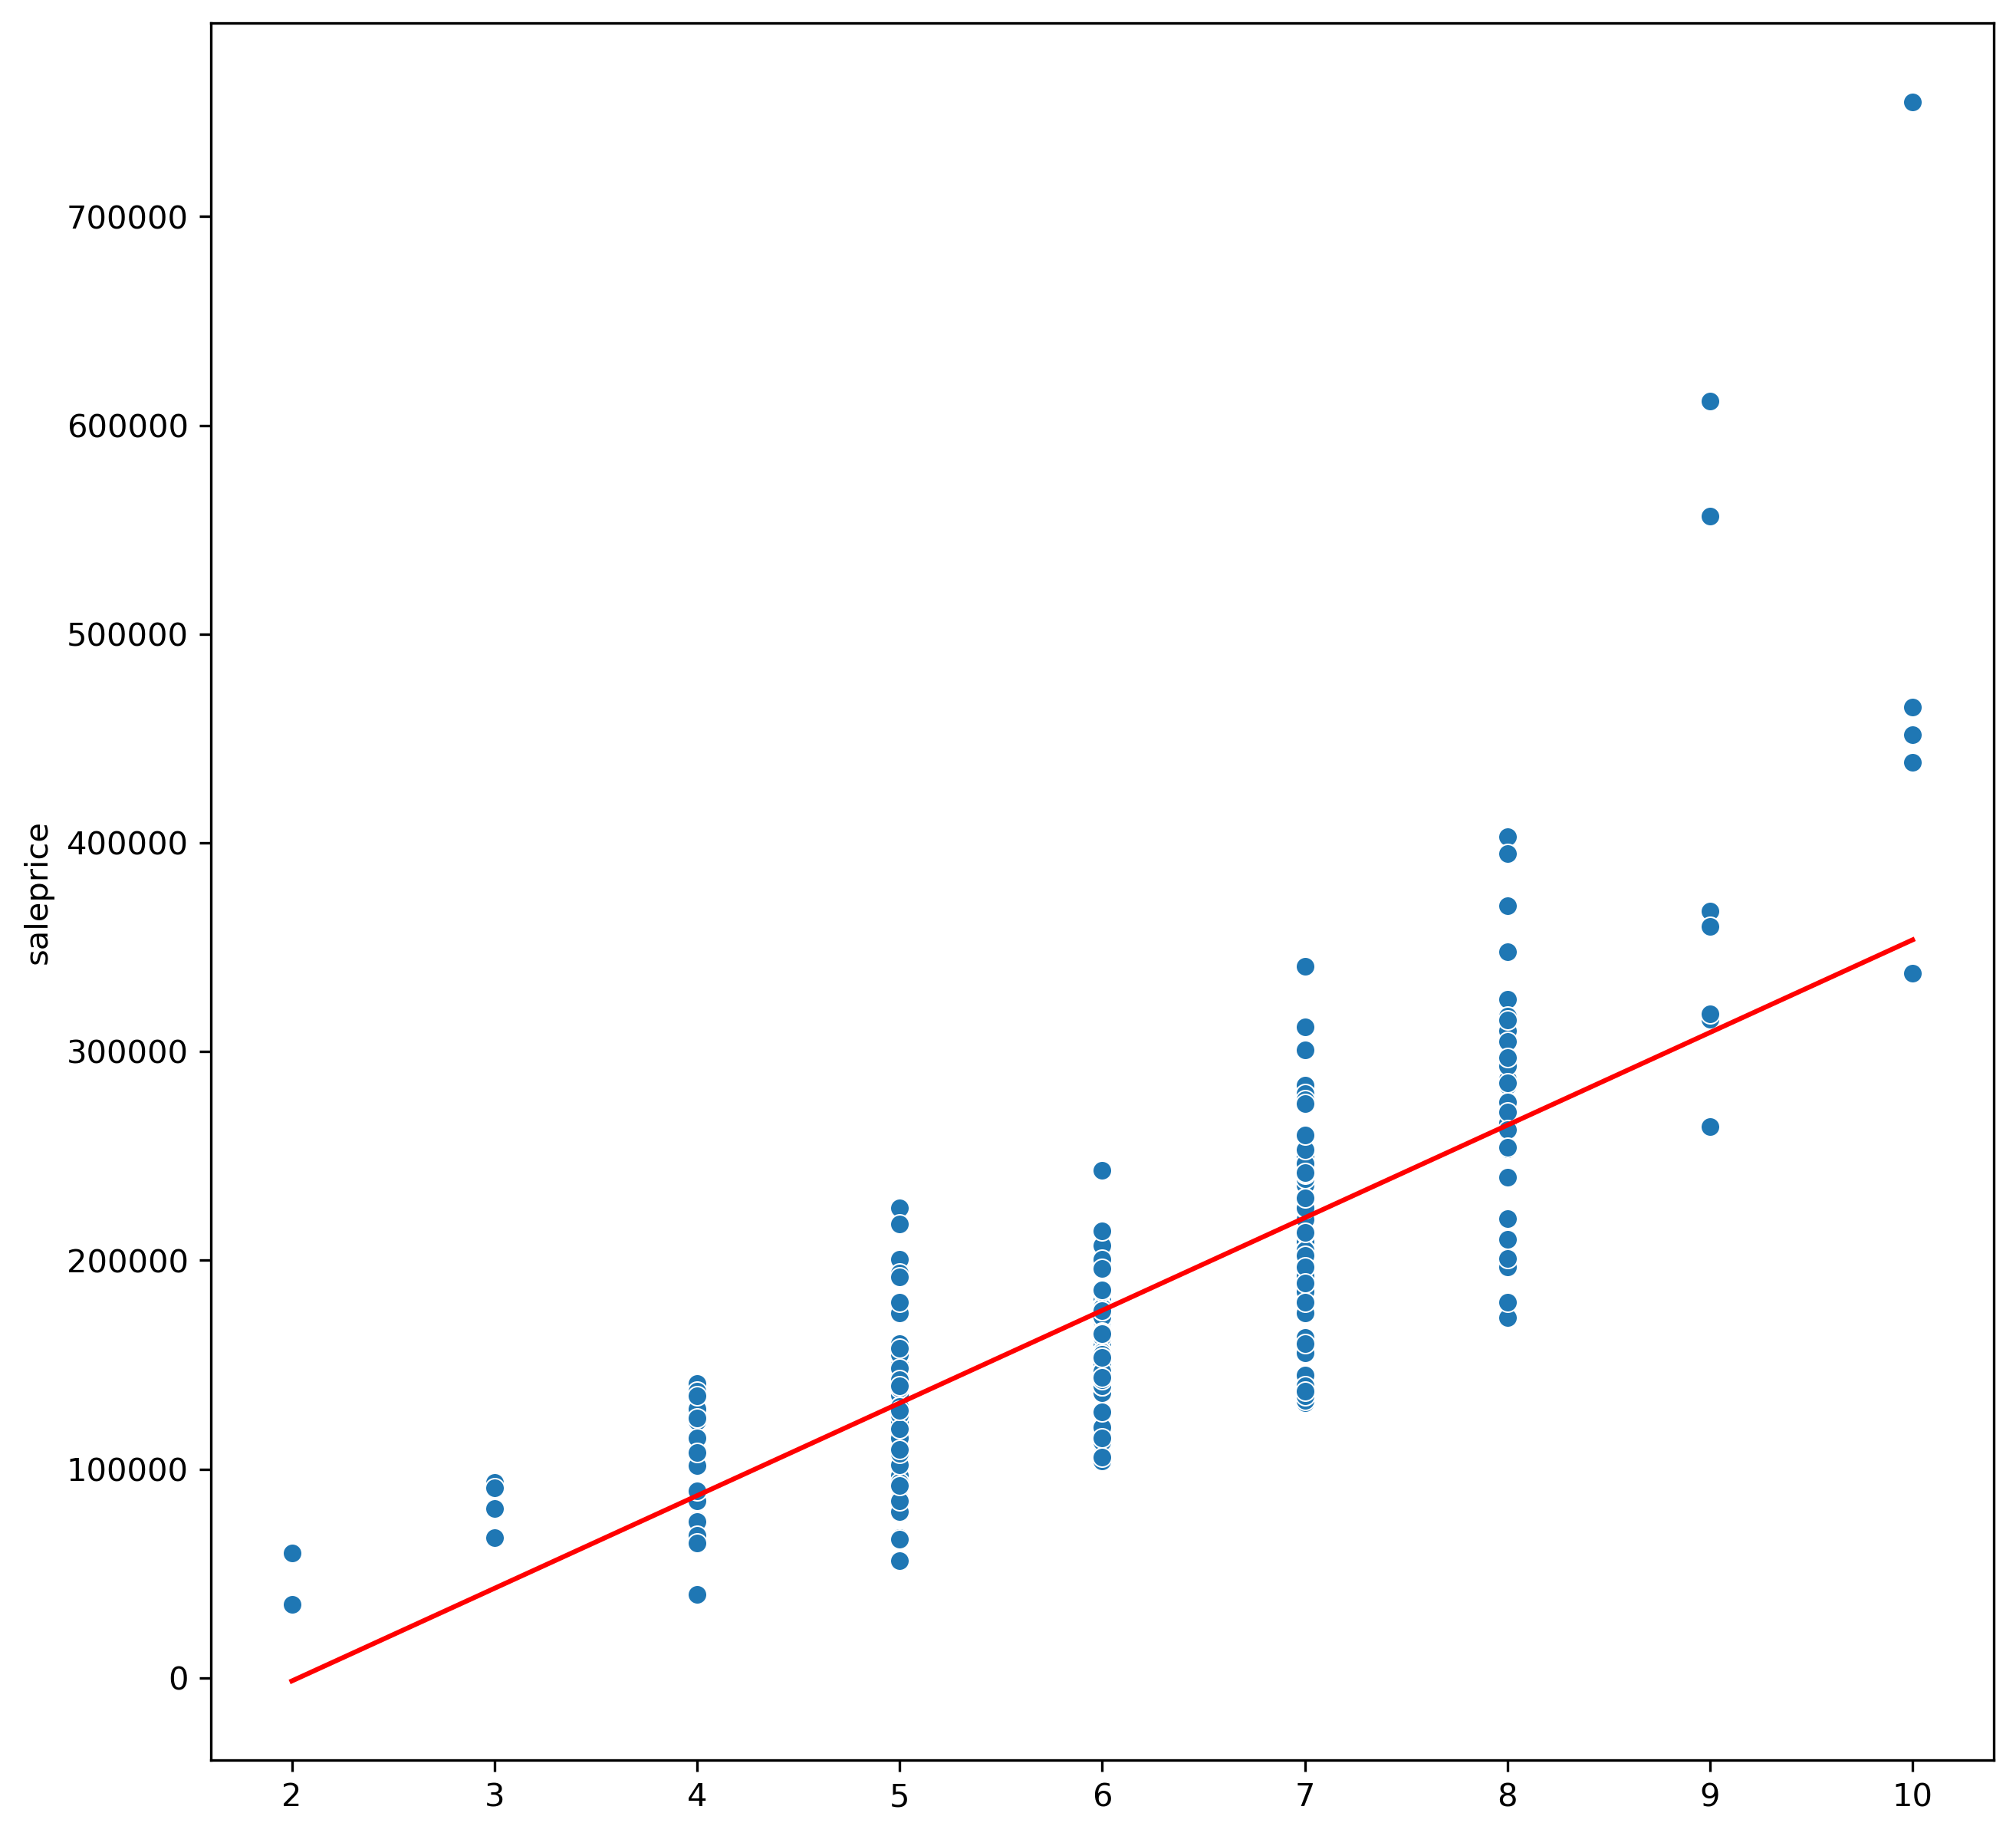

In [22]:
plt.figure(figsize=[10,10],dpi=300)
s = sns.scatterplot(x=test_x.T[0],y=test_y)
g = sns.lineplot(x=test_x.T[0],y=predictions_,color='r')
plt.setp(g.lines,alpha=1)
plt.savefig('./with-one-feature.jpg')
plt.show()

In [36]:
def cost_function(x, y, theta):
    return np.sum((np.dot(x, theta) - y) ** 2) / 2 * len(y)

def gradient_decent(x, y, learning_rate, epochs):
    cost_history = []
    theta = np.zeros(train_x.shape[1] + 1)
    x= np.hstack([x,np.ones(x.shape[0]).reshape(-1,1)])

    for i in range(epochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        gradient = np.dot(x.T, loss) / len(y)
        theta = theta - learning_rate * gradient
        cost = cost_function(x, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [90]:
w, cost = gradient_decent(np.log(train_x+0.0001),np.log(train_y+0.0001),0.001,2000000)
w

array([ 0.74878263,  0.56383486,  0.04954547, -0.01869938,  0.00999165,
        6.62192753])

In [91]:
predict = np.dot(np.hstack([np.log(test_x+0.0001),np.ones(test_x.shape[0]).reshape(-1,1)]),w)
r2_score(np.log(test_y+0.0001),predict)*100,np.sqrt(mean_squared_error(np.log(test_y+0.0001),predict)),mean_absolute_error(np.log(test_y+0.0001),predict)

(77.37824159478983, 0.2054635227778292, 0.1510958897854679)

<Figure size 3600x3000 with 0 Axes>

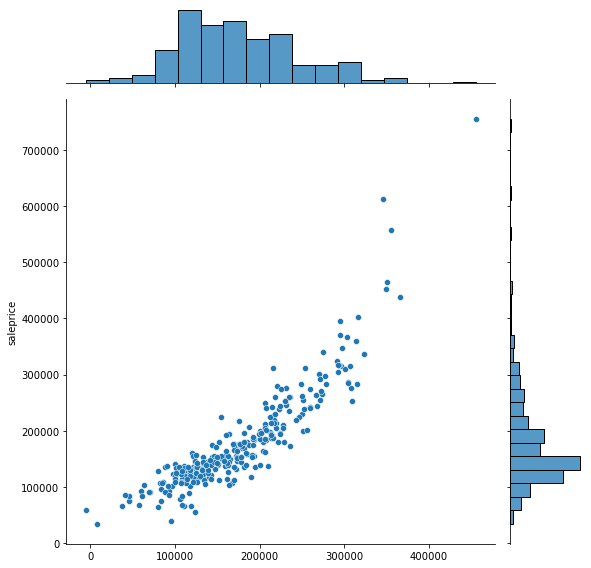

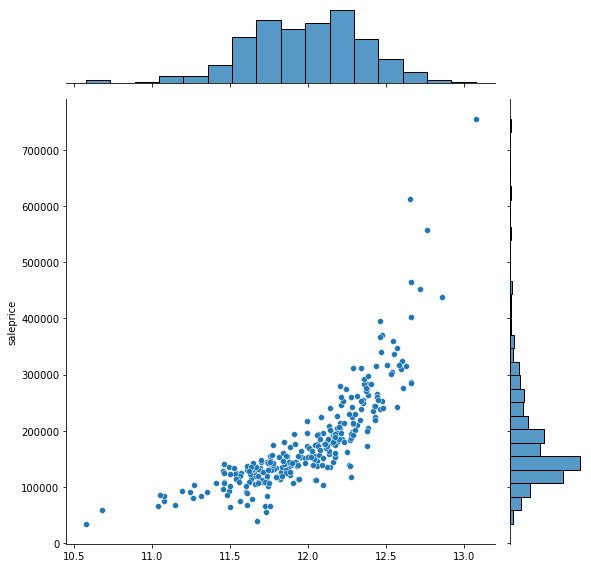

In [94]:
plt.figure(figsize=[12,10],dpi=300)
sns.jointplot(x=predictions,y=test_y,kind='scatter',height=8)
sns.jointplot(x=predict,y=test_y,kind='scatter',height=8)
# plt.savefig('./prediction.jpg')
plt.show()